In [5]:
from pip._internal import main
main(["install","progressbar"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12078 sha256=2153caad67001f907688b86a1f5aaca3d04983c83b1d0ed29fa4cec95ae7d69c
  Stored in directory: c:\users\nisarg mehta\appdata\local\pip\cache\wheels\2c\67\ed\d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built progressbar


0

In [8]:
import progressbar
import time
import os
import struct

In [9]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import numpy as np
import librosa # for sound processing.
import DataCollection as dc # a local module

In [11]:
data = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
data.shape[0]

8732

In [13]:
###data = data.sort_values(by=['fold', 'classID',"fsID"], ascending=[True, True, True])
dataset = np.zeros(shape = (data.shape[0],2),dtype = object)
dataset.shape

(8732, 2)

In [15]:
bar = progressbar.ProgressBar(maxval=data.shape[0], widgets=[progressbar.Bar('$', '||', '||'), ' ', progressbar.Percentage()])
bar.start()
for i in range(data.shape[0]):    
    fullpath, class_id = dc.path_class(data,data.slice_file_name[i])
    try:
        X, sample_rate = librosa.load(fullpath, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    except Exception:
        print("Error encountered while parsing file: ", file)
        mfccs,class_id = None, None
    feature = mfccs
    label = class_id
    dataset[i,0],dataset[i,1] = feature,label
    bar.update(i+1)

C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


In [22]:
np.save("dataset_melspectrogram",dataset,allow_pickle=True)

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

In [35]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [36]:
std = StandardScaler()

data = pd.DataFrame(np.load("dataset.npy",allow_pickle= True))
data.columns = ['feature', 'label']

In [40]:
X = np.array(data.feature.tolist())
std.fit(X)
Y = np.array(data.label.tolist())

['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']


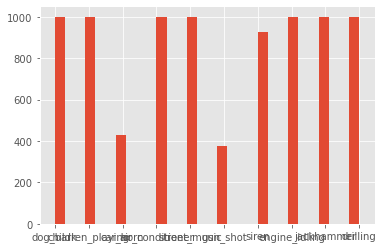

In [42]:
%matplotlib inline
plt.hist(Y, bins = 30);
print(np.unique(Y))

In [46]:
X.shape,Y.shape,X[0].reshape(1,X[0].shape[0]).shape

((8732, 40), (8732,), (1, 40))

In [47]:
from sklearn.model_selection import train_test_split
X,val_x,y,val_y = train_test_split(X,Y,test_size=0.3)
lb = LabelEncoder()

In [49]:
!pip install keras

In [51]:
from keras.utils import np_utils

y_en = np_utils.to_categorical(lb.fit_transform(y))
val_y_en = np_utils.to_categorical(lb.fit_transform(val_y))

In [56]:
def acc(y_test,prediction):

    ### PRINTING ACCURACY OF PREDICTION
    ### RECALL
    ### PRECISION
    ### CLASIFICATION REPORT
    ### CONFUSION MATRIX
    cm = confusion_matrix(y_test, prediction)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    print ('Recall:', recall)
    print ('Precision:', precision)
    print ('\n clasification report:\n', classification_report(y_test,prediction))
    print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    
    ax = sns.heatmap(confusion_matrix(y_test, prediction),linewidths= 0.5,cmap="YlGnBu")

In [62]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [66]:
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler

In [70]:
num_labels = y_en.shape[1]
nets = 5

model = [0] *nets

In [71]:
# build model
for net in range(nets):
    model[net] = Sequential()


    model[net].add(Dense(512, input_shape=(40,)))
    model[net].add(Activation('relu'))
    model[net].add(Dropout(0.45))


    model[net].add(Dense(256))
    model[net].add(Activation('relu'))
    model[net].add(Dropout(0.45))


    model[net].add(Dense(num_labels))
    model[net].add(Activation('softmax'))
    
    model[net].compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='RMSprop')

In [75]:
model[-1].summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               20992     
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [79]:
# TRAIN NETWORKS
history = [0] * nets
epochs = 132
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = X,val_x, y_en, val_y_en
    history[j] = model[j].fit(X,Y_train2, batch_size=256,
        epochs = epochs,   
        validation_data = (X_val2,Y_val2),  verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history["accuracy"]),max(history[j].history["val_accuracy"]) ))

CNN 1: Epochs=132, Train accuracy=0.96531, Validation accuracy=0.93893
CNN 2: Epochs=132, Train accuracy=0.92523, Validation accuracy=0.92214
CNN 3: Epochs=132, Train accuracy=0.92834, Validation accuracy=0.91908
CNN 4: Epochs=132, Train accuracy=0.92834, Validation accuracy=0.92252
CNN 5: Epochs=132, Train accuracy=0.92359, Validation accuracy=0.92061


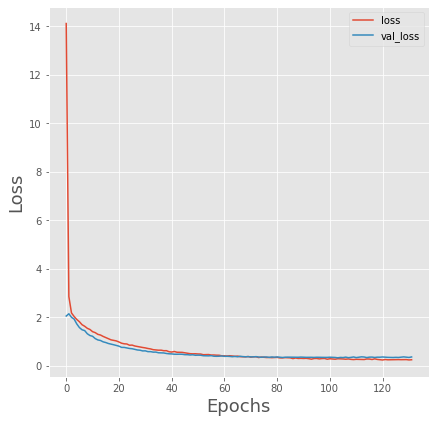

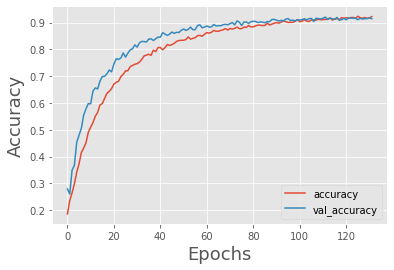

In [82]:
net = -1
name_title = ['Loss','Accuracy']
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history[net].history[list(history[net].history.keys())[i]], label = list(history[net].history.keys())[i] )
    plt.plot(history[net].history[list(history[net].history.keys())[i+2]],label = list(history[net].history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()

In [85]:
results = np.zeros( (val_x.shape[0],10) ) 
for j in range(nets):
    results = results  + model[j].predict(val_x)
results = np.argmax(results,axis = 1)

Recall: [0.97515528 0.90714286 0.91830065 0.85534591 0.95683453 0.97192982
 0.80412371 0.98032787 0.96254682 0.85761589]
Precision: [0.95440729 0.94776119 0.83136095 0.91275168 0.96376812 0.94539249
 0.95121951 0.96141479 0.96254682 0.8869863 ]

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       322
           1       0.95      0.91      0.93       140
           2       0.83      0.92      0.87       306
           3       0.91      0.86      0.88       318
           4       0.96      0.96      0.96       278
           5       0.95      0.97      0.96       285
           6       0.95      0.80      0.87        97
           7       0.96      0.98      0.97       305
           8       0.96      0.96      0.96       267
           9       0.89      0.86      0.87       302

    accuracy                           0.93      2620
   macro avg       0.93      0.92      0.92      2620
weighted avg       0.93   

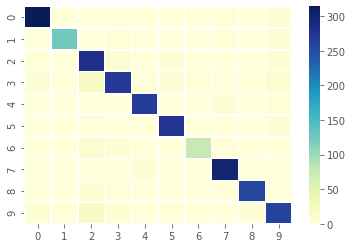

In [88]:
val_y_n = np.argmax(val_y_en,axis =1)
acc(val_y_n,results)

## Extreme Gradient Boost Classifier

In [91]:
from xgboost import XGBClassifier

In [95]:
train = np.argmax(y_en,axis =  1)
test = np.argmax(val_y_en,axis =  1)
test_x = val_x

In [98]:
model_xgb = XGBClassifier(learning_rate =0.1, 
                      n_estimators=400, 
                      max_depth=8,
                      objective= 'multi:softmax', 
                      nthread=4, )

In [99]:
model_xgb.fit(X,train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
pred = model_xgb.predict(test_x)

Recall: [0.95652174 0.86428571 0.87581699 0.83647799 0.9028777  0.94736842
 0.82474227 0.97704918 0.95131086 0.82450331]
Precision: [0.9625     0.96031746 0.81707317 0.90169492 0.89964158 0.95744681
 0.88888889 0.91975309 0.93040293 0.82178218]

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       322
           1       0.96      0.86      0.91       140
           2       0.82      0.88      0.85       306
           3       0.90      0.84      0.87       318
           4       0.90      0.90      0.90       278
           5       0.96      0.95      0.95       285
           6       0.89      0.82      0.86        97
           7       0.92      0.98      0.95       305
           8       0.93      0.95      0.94       267
           9       0.82      0.82      0.82       302

    accuracy                           0.90      2620
   macro avg       0.91      0.90      0.90      2620
weighted avg       0.90   

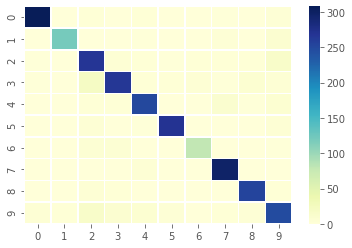

In [104]:
acc(test,pred)

In [109]:
results = np.zeros( (val_x.shape[0],10) ) 
for j in range(nets):
    results = results  + model[j].predict_proba(val_x) + model_xgb.predict_proba(val_x)

Recall: [0.9689441  0.9        0.90522876 0.85220126 0.93884892 0.96842105
 0.82474227 0.98032787 0.9588015  0.86092715]
Precision: [0.96594427 0.94029851 0.84194529 0.90635452 0.93548387 0.95833333
 0.93023256 0.94920635 0.96603774 0.86092715]

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       322
           1       0.94      0.90      0.92       140
           2       0.84      0.91      0.87       306
           3       0.91      0.85      0.88       318
           4       0.94      0.94      0.94       278
           5       0.96      0.97      0.96       285
           6       0.93      0.82      0.87        97
           7       0.95      0.98      0.96       305
           8       0.97      0.96      0.96       267
           9       0.86      0.86      0.86       302

    accuracy                           0.92      2620
   macro avg       0.93      0.92      0.92      2620
weighted avg       0.92   

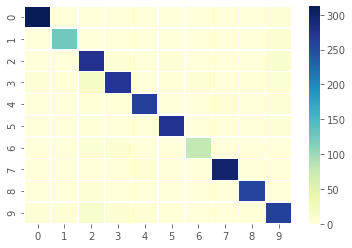

In [110]:
results = np.argmax(results,axis = 1)
acc(test,results)

In [112]:
results = np.zeros( (val_x.shape[0],10) ) 
for j in range(nets):
    results = results  + model[j].predict_proba(val_x) + nets*model_xgb.predict_proba(val_x)

Recall: [0.95962733 0.87142857 0.87581699 0.8427673  0.90647482 0.95087719
 0.83505155 0.97704918 0.95131086 0.82781457]
Precision: [0.965625   0.953125   0.82461538 0.90847458 0.89679715 0.95422535
 0.9        0.92260062 0.93726937 0.82508251]

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       322
           1       0.95      0.87      0.91       140
           2       0.82      0.88      0.85       306
           3       0.91      0.84      0.87       318
           4       0.90      0.91      0.90       278
           5       0.95      0.95      0.95       285
           6       0.90      0.84      0.87        97
           7       0.92      0.98      0.95       305
           8       0.94      0.95      0.94       267
           9       0.83      0.83      0.83       302

    accuracy                           0.91      2620
   macro avg       0.91      0.90      0.90      2620
weighted avg       0.91   

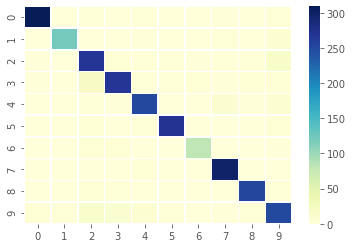

In [113]:
results = np.argmax(results,axis = 1)
acc(test,results)

## Convolutional Neural Network

In [116]:
data = pd.DataFrame(np.load("dataset.npy",allow_pickle= True))
data.columns = ['feature', 'label']

from sklearn.preprocessing import LabelEncoder

In [117]:
X = np.array(data.feature.tolist())
y = np.array(data.label.tolist())
from sklearn.model_selection import train_test_split
X,val_x,y,val_y = train_test_split(X,y)
lb = LabelEncoder()

from keras.utils import np_utils

y = np_utils.to_categorical(lb.fit_transform(y))
val_y = np_utils.to_categorical(lb.fit_transform(val_y))

In [122]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [124]:
num_labels = y.shape[1]
filter_size = 3

In [125]:
# build model
model = Sequential()

model.add(Dense(512, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [130]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               20992     
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [132]:
model.fit(X, y, batch_size=64, epochs=64, validation_data=(val_x, val_y))

Epoch 1/64
103/103 [==============================] - 1s 8ms/step - loss: 0.6983 - accuracy: 0.7595 - val_loss: 0.5864 - val_accuracy: 0.8172
Epoch 2/64
103/103 [==============================] - 1s 7ms/step - loss: 0.6873 - accuracy: 0.7648 - val_loss: 0.5725 - val_accuracy: 0.8250
Epoch 3/64
103/103 [==============================] - 1s 7ms/step - loss: 0.6627 - accuracy: 0.7684 - val_loss: 0.5856 - val_accuracy: 0.8296
Epoch 4/64
103/103 [==============================] - 1s 7ms/step - loss: 0.6566 - accuracy: 0.7711 - val_loss: 0.5637 - val_accuracy: 0.8337
Epoch 5/64
103/103 [==============================] - 1s 7ms/step - loss: 0.6437 - accuracy: 0.7820 - val_loss: 0.5339 - val_accuracy: 0.8410
Epoch 6/64
103/103 [==============================] - 1s 7ms/step - loss: 0.6227 - accuracy: 0.7870 - val_loss: 0.5133 - val_accuracy: 0.8461
Epoch 7/64
103/103 [==============================] - 1s 7ms/step - loss: 0.6038 - accuracy: 0.7936 - val_loss: 0.5163 - val_accuracy: 0.8438
Epoch 

## Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
from pip._internal import main
main(["install","progressbar"])
import progressbar
import time

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Processing c:\users\nisarg mehta\appdata\local\pip\cache\wheels\2c\67\ed\d84123843c937d7e7f5ba88a270d11036473144143355e2747\progressbar-2.5-py3-none-any.whl


In [139]:
train = np.argmax(y,axis =  1)

In [142]:
train.shape

(6549,)

In [143]:
test = np.argmax(val_y,axis =  1)

In [144]:
x =X
X.shape

(6549, 40)

In [146]:
test_x = val_x

In [148]:
import sklearn.metrics as met

In [149]:
score = []
l = [i for i in range(50,300,25)]
for i in range(50,300,25):
    model = RandomForestClassifier(n_estimators=i ,criterion = "entropy", bootstrap= False)
    model.fit(x,train)
    pred = model.predict(test_x)
    score.append(met.accuracy_score(test, pred))

In [150]:
met.accuracy_score(test, pred)

0.9033440219880898

In [154]:
met.confusion_matrix(test, pred)

array([[230,   0,   0,   0,   1,   0,   0,   2,   0,   2],
       [  0,  83,   5,   2,   2,   3,   0,   2,   4,   9],
       [  1,   0, 228,  10,   3,   0,   0,   3,   0,   5],
       [  2,   1,  12, 206,   6,   4,   0,   0,   9,   9],
       [  0,   0,   4,   0, 201,   0,   0,   9,   0,   5],
       [  0,   0,   4,   1,   1, 256,   0,   1,   1,   1],
       [  0,   0,   3,  14,   1,   0,  73,   1,   1,   4],
       [  0,   0,   1,   0,  10,   0,   0, 255,   0,   2],
       [  0,   0,   0,   4,   0,   0,   0,   0, 235,   1],
       [  1,   2,  17,   7,   8,   3,   0,   2,   5, 205]], dtype=int64)

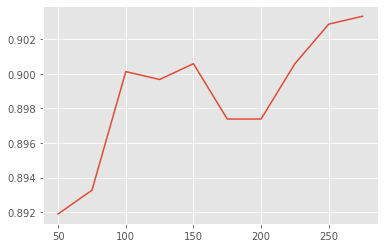

In [160]:
from matplotlib import pyplot as plt
plt.plot(l,score)
plt.show()